### Linear Regression

Linear regression is used as a predictive model that assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate) and the independent variable/s (input variable/s used in the prediction). So, this regression techniqaue finds out a linear relationship between x(input) and y(input).

### Steps and questions
- Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

- Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

- Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.
- What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?
- What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

- What do the 95% confidence intervals [0.025, 0.975] mean?

- Calculate the expected salary for someone with 12 years’ work experience.

- Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

- We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

### Importing packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from scipy import stats
from scipy.stats import sem
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as smf
from sklearn.metrics import mean_squared_error

### Examine dataset

In [2]:
df = pd.read_csv('salary.csv')
df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


#### Missing values

In [3]:
#checking for missing values
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

Looking at our DataFrame we see that we have missing values in the salary column.

In [4]:
#filling nan values 
df['salary'].fillna(df['salary'].mean(),inplace=True)

#### Splitting Dataset

In [5]:
#splitting data
x = df
y = df.salary

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Examine training set data

In [7]:
#examining training set
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
419,34603.0,0,6,4,0.79,1,0,1,0,2,1
135,53543.0,9,4,4,1.17,1,0,2,1,1,1
386,33800.0,0,0,0,0.84,1,0,1,0,3,4
122,49667.0,0,12,4,0.88,1,0,2,1,2,0
22,34731.0,1,1,1,0.85,1,0,1,1,4,3


In [8]:
#checking the number of rows and columns in training set
x_train.shape

(359, 11)

Having to observe our training set we see that we have 359 Rows and 11 columns 

### Relationship between yearsworked and salary

In [9]:
#data appropriate for linear regression
stats.pearsonr(x_train['yearsworked'],y_train)

(0.6060480089102416, 2.266003579671186e-37)

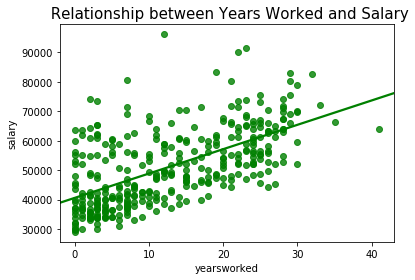

In [10]:
#plotting scatter plot
sns.regplot(x='yearsworked', y='salary', color='g', data= x_train, ci= None)
plt.title(" Relationship between Years Worked and Salary", fontsize= 15)
plt.show()

- The line of best fit illustrates that there's a strong relationship between years worked and the salary earned. 
- Also having to observe carefully in our graph you see that there are some outliers which are the furthest points from the line of best fit/ mean.

Text(0, 0.5, 'Frequency')

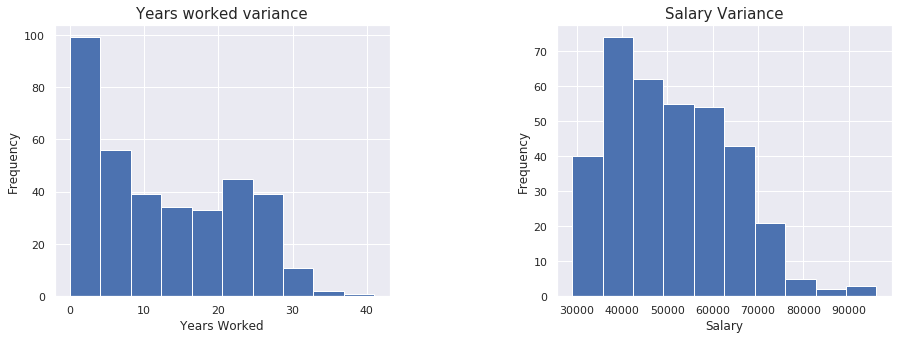

In [11]:
sns.set()
#plotting histogram & subplotting
f, axes = plt.subplots(1, 2,figsize=(15, 5))
grid = plt.GridSpec(1, 2, wspace=0.5, hspace=0.3)
plt.subplot(grid[0, 0])
x_train['yearsworked'].hist()
plt.title('Years worked variance', fontsize= 15)
plt.xlabel('Years Worked')
plt.ylabel('Frequency')

plt.subplot(grid[0, 1])
y_train.hist()
plt.title('Salary Variance', fontsize= 15)
plt.xlabel('Salary')
plt.ylabel('Frequency')

### Creating model

In [12]:
#creating model
x_train = smf.add_constant(x_train['yearsworked'])
lm = smf.OLS(y_train, x_train).fit()

/home/sibusiso/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     207.2
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.27e-37
Time:                        11:14:19   Log-Likelihood:                -3825.5
No. Observations:                 359   AIC:                             7655.
Df Residuals:                     357   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.058e+04    910.788     44.553      0.000    3.88e+04    4.24e+04
yearsworked   827.1461     57.457     14.396      0.000     714.150     940.143
==============================================================================
Omnibus:                       59.682   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.799
Skew:                           1.064   Prob(JB):                     8.61e-20
Kurtosis:                       4.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Report the amount of variance explained (R^2) 

#### significance value (p) 

#### What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

#### What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

#### What do the 95% confidence intervals [0.025, 0.975] mean?

#### Calculate the expected salary for someone with 12 years’ work experience.

#### Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

#### We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?